In [1]:
import pandas as pd
import datetime

In [2]:
df = pd.read_excel('EURRUR.xlsx')

In [3]:
df

,data,curs
0,2022-10-04,54.3947
1,2022-10-01,52.7379
2,2022-09-30,55.4064
3,2022-09-29,55.7232
4,2022-09-28,55.9953
...,...,...
1163,2018-01-16,68.8174
1164,2018-01-13,68.2562
1165,2018-01-12,68.0586
1166,2018-01-11,67.8841


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1168 non-null   datetime64[ns]
 1   curs    1168 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.4 KB


In [5]:
df = df.sort_values(by='data').reset_index(drop=True)

<AxesSubplot:xlabel='data'>

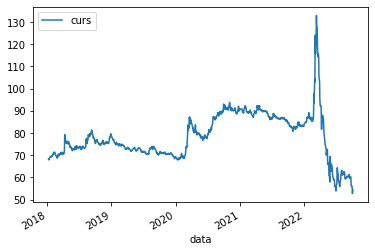

In [6]:
import matplotlib.pyplot as plt

df.set_index('data').plot()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df.set_index('data', inplace = True)

In [9]:
df

,curs
data,
2018-01-10,68.2103
2018-01-11,67.8841
2018-01-12,68.0586
2018-01-13,68.2562
2018-01-16,68.8174
...,...
2022-09-28,55.9953
2022-09-29,55.7232
2022-09-30,55.4064


In [10]:
# функция по созданию сгенерированных признаков
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['curs'].shift(lag)

    data['y_mean'] = data['curs'].shift().rolling(rolling_mean_size).mean().copy()

In [11]:
make_features(df,30,3)

In [12]:
df

,curs,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
data,,,,,,,,,,,,,,,,,,,,,
2018-01-10,68.2103,2018,1,10,2,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-11,67.8841,2018,1,11,3,0,68.2103,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-12,68.0586,2018,1,12,4,0,67.8841,68.2103,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-13,68.2562,2018,1,13,5,0,68.0586,67.8841,68.2103,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.051000
2018-01-16,68.8174,2018,1,16,1,0,68.2562,68.0586,67.8841,68.2103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.066300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28,55.9953,2022,9,28,2,0,55.9278,56.4751,58.9388,60.2110,...,59.8784,59.5983,59.5082,59.3304,59.5344,59.3934,60.8957,61.8322,62.3551,57.113900
2022-09-29,55.7232,2022,9,29,3,0,55.9953,55.9278,56.4751,58.9388,...,59.9608,59.8784,59.5983,59.5082,59.3304,59.5344,59.3934,60.8957,61.8322,56.132733
2022-09-30,55.4064,2022,9,30,4,0,55.7232,55.9953,55.9278,56.4751,...,60.5752,59.9608,59.8784,59.5983,59.5082,59.3304,59.5344,59.3934,60.8957,55.882100


In [13]:
df.dropna(inplace = True)

In [14]:
df

,curs,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
data,,,,,,,,,,,,,,,,,,,,,
2018-02-21,69.8928,2018,2,21,2,0,69.9001,70.6471,70.6718,71.2329,...,69.3953,69.2582,69.1730,69.0243,68.8174,68.2562,68.0586,67.8841,68.2103,70.406333
2018-02-22,69.8087,2018,2,22,3,0,69.8928,69.9001,70.6471,70.6718,...,69.2650,69.3953,69.2582,69.1730,69.0243,68.8174,68.2562,68.0586,67.8841,70.146667
2018-02-23,69.6341,2018,2,23,4,0,69.8087,69.8928,69.9001,70.6471,...,69.0702,69.2650,69.3953,69.2582,69.1730,69.0243,68.8174,68.2562,68.0586,69.867200
2018-02-27,68.9224,2018,2,27,1,0,69.6341,69.8087,69.8928,69.9001,...,69.4484,69.0702,69.2650,69.3953,69.2582,69.1730,69.0243,68.8174,68.2562,69.778533
2018-02-28,68.6599,2018,2,28,2,0,68.9224,69.6341,69.8087,69.8928,...,69.4580,69.4484,69.0702,69.2650,69.3953,69.2582,69.1730,69.0243,68.8174,69.455067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28,55.9953,2022,9,28,2,0,55.9278,56.4751,58.9388,60.2110,...,59.8784,59.5983,59.5082,59.3304,59.5344,59.3934,60.8957,61.8322,62.3551,57.113900
2022-09-29,55.7232,2022,9,29,3,0,55.9953,55.9278,56.4751,58.9388,...,59.9608,59.8784,59.5983,59.5082,59.3304,59.5344,59.3934,60.8957,61.8322,56.132733
2022-09-30,55.4064,2022,9,30,4,0,55.7232,55.9953,55.9278,56.4751,...,60.5752,59.9608,59.8784,59.5983,59.5082,59.3304,59.5344,59.3934,60.8957,55.882100


In [15]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('curs',axis=1),
                                                  df.curs,
                                                  shuffle = False,
                                                  test_size = 0.2)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
print('Ошибка на Train',round(mean_absolute_error(y_train, lr.predict(X_train)),2))

Ошибка на Train 0.41


In [21]:
print('Ошибка на Test',round(mean_absolute_error(y_test, lr.predict(X_test)),2))

Ошибка на Test 1.31


## Предсказываем на 5 октября

In [22]:
df_new = pd.DataFrame(df['curs']).reset_index().copy()

In [23]:
df_new

,data,curs
0,2018-02-21,69.8928
1,2018-02-22,69.8087
2,2018-02-23,69.6341
3,2018-02-27,68.9224
4,2018-02-28,68.6599
...,...,...
1133,2022-09-28,55.9953
1134,2022-09-29,55.7232
1135,2022-09-30,55.4064
1136,2022-10-01,52.7379


In [24]:
df_concat = df_new.tail(1).copy()

In [25]:
df_concat.reset_index( inplace = True , drop=True)

In [26]:
df_concat

,data,curs
0,2022-10-04,54.3947


In [27]:
#df_concat['dDate'] = pd.to_datetime('2022-10-04')

In [28]:
import numpy as np
df_concat['curs'] = 0

In [29]:
df_concat

,data,curs
0,2022-10-04,0


In [30]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1 non-null      datetime64[ns]
 1   curs    1 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 144.0 bytes


In [31]:
df2 = pd.concat([df_new,df_concat], ignore_index=True)
df2

,data,curs
0,2018-02-21,69.8928
1,2018-02-22,69.8087
2,2018-02-23,69.6341
3,2018-02-27,68.9224
4,2018-02-28,68.6599
...,...,...
1134,2022-09-29,55.7232
1135,2022-09-30,55.4064
1136,2022-10-01,52.7379
1137,2022-10-04,54.3947


### Генерируем фичи для 5 октября

In [32]:
df2.set_index('data', inplace = True)

In [33]:
df2.tail()

,curs
data,
2022-09-29,55.7232
2022-09-30,55.4064
2022-10-01,52.7379
2022-10-04,54.3947
2022-10-04,0.0000


In [34]:
make_features(df2,30,3)

In [35]:
df2.drop('curs',axis=1).tail(1)

,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
data,,,,,,,,,,,,,,,,,,,,,
2022-10-04,2022,10,4,1,0,54.3947,52.7379,55.4064,55.7232,55.9953,...,60.2187,60.2842,60.2141,60.5752,59.9608,59.8784,59.5983,59.5082,59.3304,54.179667


In [36]:
lr_full = LinearRegression()

In [37]:
lr_full.fit(df.drop('curs',axis=1),df.curs)

LinearRegression()

In [38]:
print('Предсказание на 5 октября - ',lr.predict(df2.drop('curs',axis=1).tail(1))[0])

Предсказание на 5 октября -  54.76075020776099


In [39]:
print('Предсказание на 5 октября, модель видела весь датасет - ',lr_full.predict(df2.drop('curs',axis=1).tail(1))[0])

Предсказание на 5 октября, модель видела весь датасет -  54.951254009226716


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [41]:
gb = GradientBoostingRegressor()

In [42]:
gb.fit(df.drop('curs',axis=1),df.curs)

GradientBoostingRegressor()

In [43]:
gb.predict(df2.drop('curs',axis=1).tail(1))[0]

54.56655176431513

**На самом деле курс на 05.10.200 - 56.17**